# Choosing better prepaid plan

# Contents

* [Introduction](#intro)
* [Stage 1. Data preparation](#data_prep)    
* [Stage 2. Data aggregation](#data_aggr)
* [Stage 3. Users' bavaviours studying](#data_stud)
* [Stage 4. Statistical hypotheses testing](#data_test)
* [General Conclusion](#conclusion)

# Introduction <a id='intro'></a>
In this project, we will carry out a preliminary analysis of the plans based on a relatively small client selection. The selection contains information about 500 clients including who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. We will analyze the clients' behavior and determine which prepaid plan brings in more revenue.

### Stages 
We do not have information about the quality of the data, therefore, we would need to examine and prepare the data before conducting the research.
Firstly, we will prepare the data by evaluating the quality of the data, identifying if there are any significant issues that need to be addressed, addressing the issues with the data, and enriching the data. Secondly, we will aggregate the data per user to ease further analysis. Then, we will study and compare the behaviors of the users of both plans. Finally, we will test statistical hypotheses about revenue driven by different plans and by different user categories.
The project will consist of four stages:
1.	Data preparation
2.	Data aggregation
3.	Users' behaviors studying
4.	Statistical hypotheses testing



# Stage 1: Data preparation <a id='data_prep'></a>

First of all, will load the data and the libraries that we will use in this project.

In [1]:
# Loading all required libraries
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the data files into different DataFrames
calls=pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')


Next, we will prepare the data table by table. We will evaluate the quality of the data in each table, identify if there are any significant issues that need to be addressed, address the issues with the data if there are any, and enrich the data.

## Plans

We will display general data info and a sample of the data from the `plans` table.

In [3]:
# Printing the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Printing a sample of data for plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


According to the documentation and as can be seen, the table contains information about two prepaid plans including plan name, monthly charge in US dollars, monthly minute allowance, monthly text allowance, data volume allowance (in megabytes), price per minute after exceeding the package limits, price per text after exceeding the package limits, and price per extra gigabyte of data after exceeding the package limits.

There are no visible issues with the data in this table. All columns look to be in the correct format. We will leave it as it is.

## Users

We will display general data info and a sample of the data from the `users` table.

In [5]:
# Printing the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Printing a sample of data for users
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


According to the documentation and as can be seen, the table contains information about the users including a unique user identifier, user's name, user's last name, user's age in years, subscription date (in dd, mm, yy format), the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted), user's city of residence, and plan name they are subscribed for. 

As can be seen, `reg_date` and `churn_date` columns have incorrect types, so it needs to be fixed. Also, churn_date is populated only for 34 users as other users had been using the calling plans when this database was extracted. In our analysis, we will need to calculate the duration of how long the customers were using the plans. To make it simpler and take into consideration that the data was collected for the entire year 2018, we will fill missing values in the `churn_date` column with the last day of the year 2018. 

Then, to ease the further calculations we will add the mentioned above duration column. In addition, will add a column that will contain data about the users’ regions.

### Fixing the Data

As stated above, we will fill missing values in churn_date column with the last day of the year 2018. Then we will fix the format for the `reg_date` and `churn_date` columns.

In [7]:
#filling missing values in churn_date column with the last day on year 2018
users['churn_date']=users['churn_date'].fillna('2018-12-31')

#fixing the format for we reg_date and churn_date columns
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d') 
users['churn_date']=pd.to_datetime(users['churn_date'], format='%Y-%m-%d') 

Let's check that the issues were fixed.

In [8]:
# Printing the general/summary information about the users' DataFrame
print(users.info())

# Printing a sample of data for users
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31


The issue looks to be fixed. Next, we will enrich the data in the users table.

### Enriching Data

To ease the further calculations, we will add the `duration` column. This column will contain information about how many months a customer used a plan. For simplicity, we will assume that the billing date for all users is the first calendar day of each month. When a user subscribes to a plan, we consider him to be a user of the plan for that whole month. A similar applies to the month when the user stopped using the service. Therefore, to calculate the duration we will subtract registration month from churn month and add 1 to it.

In [9]:
#adding duration column
users['duration']=users['churn_date'].dt.month-users['reg_date'].dt.month+1

Let's check that the column was added correctly.

In [10]:
# Printing a sample of data for users
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,duration
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,5
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,3
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,8
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-12-31,2
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,2
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-12-31,6
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,5
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,9


In this project, we will test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from other regions. To do this we need to be able to distinguish the users by region. So, we need to add the `region` column that will contain information about the region. For users in the NY-NJ area, the value in this column will be `NY-NJ`. For users from other regions, the value in this column will be `others`.

To do this, let’s check if we can determine the users’ region by city.

In [11]:
users.city.unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

Looks like users in the NY-NJ area have the `New York-Newark-Jersey City, NY-NJ-PA MSA` value in the `city` column. We will use it as a criterion to distinguish the users from that region.

In [12]:
#adding region column
users['region']= np.where(users['city'].str.contains('NY-NJ'), 'NY-NJ', 'Other')

Lets check that the column was added correctly.

In [13]:
#printing unique values in region column
print(users['region'].value_counts())

#printing unique values in city column
users['city'].value_counts()

Other    420
NY-NJ     80
Name: region, dtype: int64


New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Raleigh-Cary, NC MSA                                1
El Paso, TX MSA                                     1
Greensboro-High Point, NC MSA                       1
Stockton, CA MSA                                    1
Cape Coral-Fort Myers, FL MSA                       1
Name: city, Length: 73, dtype: int64

Value `NY-NJ` count in the `region` column matches value `New York-Newark-Jersey City, NY-NJ-PA MSA` count in the `city` column. Thus, the `region` column was added correctly.

## Calls

We will display general data info and a sample of the data from the `calls` table.

In [14]:
# Printing the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Printing a sample of data for calls
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


According to the documentation and as can be seen, the table contains information about calls including unique call identifier, call duration (in minutes), and the identifier of the user making the call.

As can be seen, call_date has an incorrect type, so it needs to be fixed. Also, the duration column has float type, but according to documentation, for billing each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. Therefore, will change the type of that column to int rounding values there to the ceiling.

Then, to ease the further calculations we will add the `month` column. This column will contain the number of the month when the call was made.

### Fixing data

As stated above, we will round values in the `duration` column to the ceiling. Then we will fix the type for the `call_date` column.

In [16]:
#rounding values in duration column to the ceiling
calls['duration']=np.ceil(calls['duration']).astype(int)

In [17]:
#fixing the type for we call_date column
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d') 

Let's check that the issues were fixed.

In [18]:
# Printing the general/summary information about the calls' DataFrame
print(calls.info())

# Printing a sample of data for calls
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
5,1000_388,1000,2018-12-31,3
6,1000_510,1000,2018-12-27,6
7,1000_521,1000,2018-12-28,15
8,1000_530,1000,2018-12-28,6
9,1000_544,1000,2018-12-26,5


The issue looks to be fixed. Next we will enrich the data in `calls` table.

### Enriching data

To ease the further calculations, we will add the `month` column. This column will contain the number of the month when the call was made.

In [19]:
#adding month colunm
calls['month']=calls['call_date'].dt.month

Let's check that the column was added correctly.

In [20]:
#Printing a sample of data for calls
calls.head(10)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
5,1000_388,1000,2018-12-31,3,12
6,1000_510,1000,2018-12-27,6,12
7,1000_521,1000,2018-12-28,15,12
8,1000_530,1000,2018-12-28,6,12
9,1000_544,1000,2018-12-26,5,12


Values in `month` column looks correct.

## Messages

We will display general data info and a sample of the data from the `messages` table.

In [21]:
# Printing the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Printing a sample of data for messages
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


According to the documentation and as can be seen, the table contains information about messages including unique text message identifier, text message data, and the identifier of the user sending the text.

As can be seen, the `message_date` column has an incorrect type, so it needs to be fixed. Also, to ease the further calculations we will add the `month` column. This column will contain the number of months when the message was sent.

### Fixing data

As stated above, we will fix the type for the `message_date` column.

In [23]:
#fix the type for we message_date column
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d') 

Let's check that the issues were fixed.

In [24]:
# Printing the general/summary information about the messages' DataFrame
print(messages.info())

# Printing a sample of data for messages
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


The issue looks to be fixed. Next we will enrich the data in message table.

### Enriching data

To ease the further calculations, we will add the `month` column. This column will contain the number of months when the message was sent.

In [25]:
#adding month colunm
messages['month']=messages['message_date'].dt.month

Let's check that the column was added correctly.

In [26]:
# Printing a sample of data for messages
messages.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


Values in month column looks correct.

## Internet

We will display general data info and a sample of the data from the `internet` table.

In [27]:
# Printing the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
# Printing a sample of data for the internet traffic
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


According to the documentation and as can be seen, the table contains information about web sessions including unique session identifier, the volume of data spent during the session (in megabytes), web session date, and the user identifier.

As can be seen, `session_date` has an incorrect type, so it needs to be fixed. Also, to ease the further calculations we will add `month` column. This column will contain the number of the month when the session took place.

### Fixing data

As stated above, we will fix the type for the `session_date` column.

In [29]:
# fixing the type for the session_date column
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d') 

Let's check that the issues were fixed.

In [30]:
# Printing the general/summary information about the internet DataFrame
print(internet.info())

# Printing a sample of data for the internet traffic
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


The issue looks to be fixed. Next we will enrich the data in `internet` table.

### Enriching data

To ease the further calculations, we will add the `month` column. This column will contain the number of the month when the session took place.

In [31]:
#adding month colunm
internet['month']=internet['session_date'].dt.month

Let's check that the column was added correctly.

In [32]:
# Printing a sample of data for the internet traffic
internet.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


Values in the month column look correct. 

We evaluated the quality of the data in each table, identified and addressed the issues with the data, and enriched the data. Next, we will aggregate the data per user to ease further analysis.

# Stage 2: Data aggregation <a id='data_aggr'></a>

Now, when the data in the tables is prepared, we will aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis.

First, we will calculate the average number of calls per user per month and add this information to the `users` table. To do this we will group data in the `calls` table by `user_id`. We will count the number of entries in each group and merge this data to the `users` table. Some users may have no calls in some months, therefore we will use the 'left' method of merge and then fill missing values with 0. Then we will divide those values by `duration` the customer used the plan to get the average value.

In [33]:
# grouping data in calls table by user_id and counting the number of entries in each group
calls_per_user=calls.groupby('user_id')['duration'].count()

#renaming the column that cantains the counts
calls_per_user=calls_per_user.rename('avg_calls_monthly') 

#merging the calls count data to users table
users=users.merge(calls_per_user, on='user_id', how='left')

#filling missing values in 'avg_calls_monthly' column with 0
users['avg_calls_monthly']=users['avg_calls_monthly'].fillna(0)

#dividing values in 'avg_calls_monthly' column by `duration` the customer used the plan to get the average values
users['avg_calls_monthly']=(users['avg_calls_monthly']/users['duration']).astype(int)

#Printing a sample of data for the users to ensure that the data was added correctly
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,duration,region,avg_calls_monthly
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,Other,16
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,5,Other,52
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,3,Other,37
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,12,Other,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,8,Other,46


Secondly, we will calculate the average number of minutes spent on calls per user per month and add this information to the users table. To do this we will group data in the calls table by user_id. We will sum up individual calls duration in each group and merge this data to the users table. Some users may have no calls in some months, therefore we will use the 'left' method of merge and then fill missing values with 0. Then we will divide those values by the duration the customer used the plan to get the average value.

In [34]:
# grouping data in calls table by user_id and summing up individual calls duration in each group
min_per_user=calls.groupby('user_id')['duration'].sum()

#renaming the column that cantains summed up calles duration
min_per_user=min_per_user.rename('avg_min_monthly')

#merging the data to users table
users=users.merge(min_per_user, on='user_id', how='left')

#filling missing values in 'avg_min_monthly' column with 0
users['avg_min_monthly']=users['avg_min_monthly'].fillna(0)

#dividing values in 'avg_min_monthly' column by `duration` the customer used the plan to get the average values
users['avg_min_monthly']=(users['avg_min_monthly']/users['duration']).astype(int)

#Printing a sample of data for the users to ensure that the data was added correctly
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,duration,region,avg_calls_monthly,avg_min_monthly
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,Other,16,124
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,5,Other,52,345
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,3,Other,37,276
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,12,Other,12,92
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,8,Other,46,346


Next, we will calculate the average number of messages per user per month and add this information to the users table. To do this we will group data in the `messages` table by `user_id`. We will count the number of messages in each group and merge this data to the users table. Some users may have no messages in some months, therefore we will use the 'left' method of merge and then fill missing values with 0. Then we will divide those values by the duration the customer used the plan to get the average value.

In [35]:
#grouping data in messages table by user_id and counting the number of entries in each group
messages_per_user=messages.groupby('user_id')['month'].count()

#renaming the column that cantains the counts
messages_per_user=messages_per_user.rename('avg_messages_monthly')

#merging the messages count data to users table
users=users.merge(messages_per_user, on='user_id', how='left')

#filling missing values in 'avg_messages_monthly' column with 0
users['avg_messages_monthly']=users['avg_messages_monthly'].fillna(0)

#dividing values in 'avg_messages_monthly' column by `duration` the customer used the plan to get the average values
users['avg_messages_monthly']=(users['avg_messages_monthly']/users['duration']).astype(int)

#Printing a sample of data for the users to ensure that the data was added correctly
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,duration,region,avg_calls_monthly,avg_min_monthly,avg_messages_monthly
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,Other,16,124,11
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,5,Other,52,345,41
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,3,Other,37,276,29
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,12,Other,12,92,4
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,8,Other,46,346,22


Then, we will calculate the average traffic per user per month and add this information to the users table. To do this we will group data in the internet table by user_id. We will sum up individual sessions traffic in each group in each group and merge this data to the users table. Some users may not use internet traffic in some months, therefore we will use the 'left' method of merge and then fill missing values with 0. Then we will divide those values by the duration the customer used the plan to get the average value.

In [36]:
#grouping data in internet table by user_id and summing up individual sessionss traffic in each group
traffic_per_user=internet.groupby('user_id')['mb_used'].sum()

#renaming the column that cantains the summed up traffic
traffic_per_user=traffic_per_user.rename('avg_traffic_monthly')

#merging the data to users table
users=users.merge(traffic_per_user, on='user_id', how='left')

#filling missing values in 'avg_traffic_monthly' column with 0
users['avg_traffic_monthly']=users['avg_traffic_monthly'].fillna(0)

#dividing values in 'avg_traffic_monthly' column by `duration` the customer used the plan to get the average values
users['avg_traffic_monthly']=(users['avg_traffic_monthly']/users['duration']).astype(int)

#Printing a sample of data for the users to ensure that the data was added correctly
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,duration,region,avg_calls_monthly,avg_min_monthly,avg_messages_monthly,avg_traffic_monthly
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,Other,16,124,11,1901
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,5,Other,52,345,41,16087
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,3,Other,37,276,29,13431
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,12,Other,12,92,4,2253
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,8,Other,46,346,22,19544


Finally, we will calculate the average revenue per user per month and add this information to the users table. We cannot calculate average monthly revenue using average minutes, messages, and traffic values calculated previously, because it will give an incorrect result. For example, if a user of surf plan used just 1 minute in one month and 999 minutes in the second month, the avarage number of minutes would be 500 which is within the prepaid limit. But in fact, in the second month, the user would be charged 499*0.03=$4.97 for the minutes used beyond the limit. 

To calculate average monthly revenue we will define a function that will take a row from users table as an input and will return the average monthly revenue for that user. For a given user the function will get a slice of the data for this user from `calls`, `messages` and `internet` tables and will aggregate these slices by months. For every month the function will calculate the number of minutes, messages, and traffic used beyond the limit and multiply them by coefficients provided in the plan table. Then, these values will be summed up, and plan monthly charges will be added. And then the get value will be divided by the number of months the customer used the plan.

In [37]:
# defining function to calculate monthly revenue for a user
def revenue(user):

#declaring revenue variable and setting it to 0
    revenue=0    

#getting user_id, plan and duration from the function input
    user_id=user['user_id']
    plan=user['plan']
    duration=user['duration']   
    
#getting the number of minutes used by the user in each month
    calls_duration=calls[calls['user_id']==user_id].pivot_table(index='month',values='duration',aggfunc='sum')
    
#getting the number of messages used by the user in each month
    messages_count=messages[messages['user_id']==user_id].pivot_table(index='month',values='message_date',aggfunc='count')
    
#getting the amoiunt of traffic for the user in each month
    traffic_count=internet[internet['user_id']==user_id].pivot_table(index='month',values='mb_used',aggfunc='sum')
    
#culculation total revenue for the user if hes plan is surf              
    if plan=='surf':        
#looping through the months in calls_duration table, calculating the amount of 
#minutes used beyond limit and multiplying them by coefficient provided in the plan table
        for month in calls_duration.index:        
            if calls_duration.loc[month,'duration']>500:
                revenue+=(calls_duration.loc[month,'duration']-500)*0.03
#looping through the months in messages_count table, calculating the amount of 
#messages used beyond limit and multiplying them by coefficient provided in the plan table
        for month in messages_count.index: 
            if messages_count.loc[month,'message_date']>50:
                revenue+=(messages_count.loc[month,'message_date']-50)*0.03                
#looping through the months in traffic_count table, calculating the amount of 
#traffic used beyond limit and multiplying it by coefficient provided in the plan table
        for month in traffic_count.index:
            if traffic_count.loc[month,'mb_used']>15360:
                revenue+=((traffic_count.loc[month,'mb_used']//1024)+1-15)*10
#adding the plan monthly charges to total revenue
        revenue+=duration*20
        
#culculation total revenue for the user if hes plan is ultimate                  
    if plan=='ultimate':
#looping through the months in calls_duration table, calculating the amount of 
#minutes used beyond limit and multiplying them by coefficient provided in the plan table
        for month in calls_duration.index:
            if calls_duration.loc[month,'duration']>3000:
                revenue+=(calls_duration.loc[month,'duration']-3000)*0.01 
#looping through the months in messages_count table, calculating the amount of 
#messages used beyond limit and multiplying them by coefficient provided in the plan table
        for month in messages_count.index: 
            if messages_count.loc[month,'message_date']>1000:
                revenue+=(messages_count.loc[month,'message_date']-1000)*0.01
#looping through the months in traffic_count table, calculating the amount of 
#traffic used beyond limit and multiplying it by coefficient provided in the plan table
        for month in traffic_count.index:
            if traffic_count.loc[month,'mb_used']>30720:
                revenue+=((traffic_count.loc[month,'mb_used']//1024)+1-30)*7
#adding the plan monthly charges to total revenue
        revenue+=duration*70

#returning the average monthly revenue for the user (total revenue divided by the number of months the customer used the plan)
    return int(revenue/duration)

Next, we will apply the defined function to add average monthly revenue to the user table.

In [38]:
#applying the defined function to add average monthly revenue to the user table
users['avg_revenue_monthly']=users.apply(revenue, axis=1)

Lets check that the average revenue was added correctly.

In [39]:
#Printing a sample of data for the users to ensure that the data was added correctly
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,duration,region,avg_calls_monthly,avg_min_monthly,avg_messages_monthly,avg_traffic_monthly,avg_revenue_monthly
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,Other,16,124,11,1901,70
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,5,Other,52,345,41,16087,50
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,3,Other,37,276,29,13431,33
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,12,Other,12,92,4,2253,31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,8,Other,46,346,22,19544,76


Although for further analysis we will use average minutes, messages, traffic, and revenue values, it also could be useful to have data for each user for each month. We will aggregate data for each user for each month in a separate data frame, so we can use it in the future. To do this, firstly, we will group data in calls, messages, and internet table by user and month.

In [40]:
#grouping data in calls table by user and month and culculation number of calls in each group
calls_per_user_per_month=calls.pivot_table(index=['user_id', 'month'], values='duration',aggfunc='count').reset_index()

#grouping data in calls table by user and month and culculation sum of calls duration in each group
minutes_per_user_per_month=calls.pivot_table(index=['user_id', 'month'], values='duration',aggfunc='sum').reset_index()

#grouping data in messages table by user and month and culculation number of messages in each group
messages_per_user_per_month=messages.pivot_table(index=['user_id', 'month'], values='message_date',aggfunc='count').reset_index()

#grouping data in internet table by user and month and culculation sum of traffic in each group
trafic_per_user_per_month=internet.pivot_table(index=['user_id', 'month'], values='mb_used',aggfunc='sum').reset_index()

Next, we will merge the grouped data together and add plan details. As some users may have no calls, messages, or internet data in some months we will use the outer type of merge.

In [41]:
#merging calls, messages and internet gpoupped data to data_per_user_per_month data frame
data_per_user_per_month=calls_per_user_per_month.merge(minutes_per_user_per_month, on=['user_id', 'month'], how='outer')
data_per_user_per_month=data_per_user_per_month.merge(messages_per_user_per_month, on=['user_id', 'month'], how='outer')
data_per_user_per_month=data_per_user_per_month.merge(trafic_per_user_per_month, on=['user_id', 'month'], how='outer')

#renaming columns in the new data frame
data_per_user_per_month.columns=['user_id','month','calls','minutes','messages','mb_used']

#adding plan information to the new data frame
data_per_user_per_month=data_per_user_per_month.merge(users[['user_id','plan']], on=['user_id'])

Lets check that the data was merged correctly.

In [42]:
#printing sample of data from data_per_user_per_month table
data_per_user_per_month

,user_id,month,calls,minutes,messages,mb_used,plan
0,1000,12,16.0,124.0,11.0,1901.47,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,surf
2,1001,9,49.0,315.0,44.0,13314.82,surf
3,1001,10,65.0,393.0,53.0,22330.49,surf
4,1001,11,64.0,426.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36730.05,ultimate
2289,1349,10,NaN,NaN,76.0,13093.55,surf
2290,1349,11,NaN,NaN,72.0,17128.26,surf
2291,1349,12,NaN,NaN,61.0,13039.91,surf


As can be seen, as we predicted, some users have no calls, messages, or internet data in some months. We will fill the missing values with 0.

In [43]:
data_per_user_per_month=data_per_user_per_month.fillna(0)

Finally, we will calculate revenue for each user for each month and add this information to the table. We will build a function for revenue calculation.

In [44]:
# defining function to calculate monthly revenue for a user based on data per month
def revenue1(user):

#declaring revenue variable and setting it to 0
    revenue=0    

#getting plan
    plan=user['plan']
      
    
#culculation total revenue for the user if hes plan is surf              
    if plan=='surf':        
#calculating the amounts used beyond limit and multiplying them by coefficient provided in the plan table  
    
        if user['minutes']>500:
            revenue+=(user['minutes']-500)*0.03
        if user['messages']>50:
            revenue+=(user['messages']-50)*0.03    
        if user['mb_used']>15360:
            revenue+=((user['mb_used']//1024)+1-15)*10
#adding plan monthly charges
        revenue+=20
        
#culculation total revenue for the user if hes plan is ultimate                  
    if plan=='ultimate':
#calculating the amounts used beyond limit and multiplying them by coefficient provided in the plan table  
        if user['minutes']>3000:
            revenue+=(user['minutes']-3000)*0.01
        if user['messages']>1000:
            revenue+=(user['messages']-1000)*0.01    
        if user['mb_used']>30720:
            revenue+=((user['mb_used']//1024)+1-30)*7 
#adding plan monthly charges
        revenue+=70

#returning the revenue 
    return int(revenue)

In [45]:
#using the function to add revenue to data_per_user_per_month table
data_per_user_per_month['revenue']=data_per_user_per_month.apply(revenue1, axis=1)

Lets check that the revenue was added correctly

In [46]:
data_per_user_per_month

,user_id,month,calls,minutes,messages,mb_used,plan,revenue
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,70
1,1001,8,27.0,182.0,30.0,6919.15,surf,20
2,1001,9,49.0,315.0,44.0,13314.82,surf,20
3,1001,10,65.0,393.0,53.0,22330.49,surf,90
4,1001,11,64.0,426.0,36.0,18504.30,surf,60
...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36730.05,ultimate,112
2289,1349,10,0.0,0.0,76.0,13093.55,surf,20
2290,1349,11,0.0,0.0,72.0,17128.26,surf,40
2291,1349,12,0.0,0.0,61.0,13039.91,surf,20


We aggregate the data per user to ease further analysis. Next, we will study and compare the behaviors of the users of both plans.

# Stage 3: Studying user behaviour <a id='data_stud'></a>

At this stage, we will study and compare the behaviors of the users of both plans. We will Find the minutes, texts, and volume of data the users of each plan require per month. Also, we will calculate the mean, variance, and standard deviation, plot histograms, and describe the distributions.

As we will study user behavior per plan we will get slices of data from the `users` table for each plan.

In [47]:
#getting slaces of data for users of surf plan.
surf_users=users.loc[users['plan']=='surf',['user_id','region','avg_calls_monthly','avg_min_monthly','avg_messages_monthly','avg_traffic_monthly','avg_revenue_monthly']]

#getting slaces of data for users of surf plan.
ultimate_users=users.loc[users['plan']=='ultimate',['user_id','region','avg_calls_monthly','avg_min_monthly','avg_messages_monthly','avg_traffic_monthly','avg_revenue_monthly']]

## Calls number

Firstly, we will calculate the mean, variance, and standard deviation, plot histograms and describe the distributions for calls numbers for users of each plan.

In [48]:
#using describe method to get mean, standard deviation, and other statistics for calls for users of surf plan
surf_users['avg_calls_monthly'].describe()

count    339.000000
mean      43.038348
std       28.253633
min        0.000000
25%       20.000000
50%       41.000000
75%       62.500000
max      144.000000
Name: avg_calls_monthly, dtype: float64

In [49]:
#using describe method to get mean, standard deviation, and other statistics for calls for users of ultimate plan
ultimate_users['avg_calls_monthly'].describe()

count    161.000000
mean      41.180124
std       31.024363
min        0.000000
25%       17.000000
50%       33.000000
75%       65.000000
max      146.000000
Name: avg_calls_monthly, dtype: float64

In [50]:
#calculating variance for calls for users of surf plan
print(np.var(surf_users['avg_calls_monthly']))

795.9129837018473


In [51]:
#calculating variance for calls for users of ultimate plan
print(np.var(ultimate_users['avg_calls_monthly']))

956.5327726553758


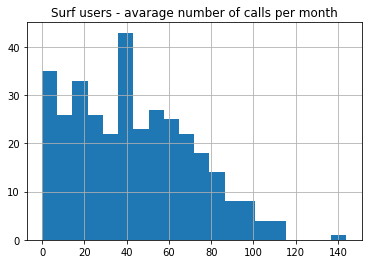

In [52]:
#plotting histogram for calls for users of surf plan
surf_users['avg_calls_monthly'].hist(bins=20)
plt.title('Surf users - avarage number of calls per month')
plt.show()

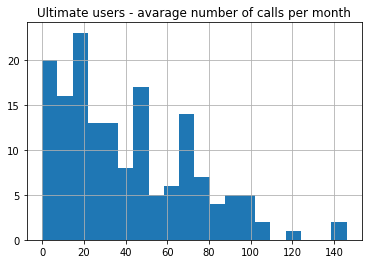

In [53]:
#plotting histogram for calls for users of ultimate plan
ultimate_users['avg_calls_monthly'].hist(bins=20)
plt.title('Ultimate users - avarage number of calls per month')
plt.show()

As can be seen, on average users of both plans make quite the same number of calls (43 and 47) per month. But there is a greater variance in call numbers for ultimate plan users. The typical users of both plans make between 0 and 80 calls monthly, while outliers in both plans make more than 140 calls in a month.

## Calls duration

Next, we will calculate the mean, variance, and standard deviation, plot histograms and describe the distributions for minutes used for users of each plan.

In [54]:
#using describe method to get mean, standard deviation, and other statistics for minutes used for users of surf plan
surf_users['avg_min_monthly'].describe()

count     339.000000
mean      311.634218
std       206.017913
min         0.000000
25%       138.500000
50%       293.000000
75%       452.000000
max      1055.000000
Name: avg_min_monthly, dtype: float64

In [55]:
#using describe method to get mean, standard deviation, and other statistics for minutes used for users of ultimate plan
ultimate_users['avg_min_monthly'].describe()

count     161.000000
mean      292.937888
std       220.297177
min         0.000000
25%       123.000000
50%       238.000000
75%       444.000000
max      1054.000000
Name: avg_min_monthly, dtype: float64

In [56]:
#calculation variance for minutes used for users of surf plan
np.var(surf_users['avg_min_monthly'])

42318.178888105744

In [57]:
#calculation variance for minutes used for users of ultimate plan
np.var(ultimate_users['avg_min_monthly'])

48229.412291192464

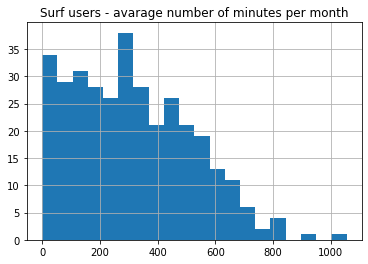

In [58]:
#plotting histogram for minutes used for users of surf plan
surf_users['avg_min_monthly'].hist(bins=20)
plt.title('Surf users - avarage number of minutes per month')
plt.show()

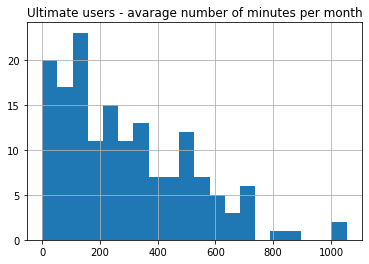

In [59]:
#plotting histogram for minutes used for users of ultimate plan
ultimate_users['avg_min_monthly'].hist(bins=20)
plt.title('Ultimate users - avarage number of minutes per month')
plt.show()

As can be seen, similar to the number of calls users of surf plan on average talk a bit more than users of ultimate plan (311 and 292 minutes correspondingly). But again, there is a greater variance in the number of minutes for ultimate plan users. The typical users in both plans use between 0 and 600 minutes monthly, while outliers in both plans spend more than 1000 minutes in calls monthly.

## Messages

Next, we will calculate the mean, variance, and standard deviation, plot histograms and describe the distributions for messages for users of each plan.

In [60]:
#using describe method to get mean, standard deviation, and other statistics for messages for users of surf plan
surf_users['avg_messages_monthly'].describe()

count    339.000000
mean      23.663717
std       26.058064
min        0.000000
25%        2.000000
50%       18.000000
75%       35.000000
max      130.000000
Name: avg_messages_monthly, dtype: float64

In [61]:
#using describe method to get mean, standard deviation, and other statistics for messages for users of ultimate plan
ultimate_users['avg_messages_monthly'].describe()

count    161.000000
mean      26.391304
std       27.746210
min        0.000000
25%        3.000000
50%       18.000000
75%       45.000000
max      143.000000
Name: avg_messages_monthly, dtype: float64

In [62]:
#calculation variance for messages for users of surf plan
np.var(surf_users['avg_messages_monthly'])

677.0196569817526

In [63]:
#calculation variance for messages for users of ultimate plan
np.var(ultimate_users['avg_messages_monthly'])

765.0704833918444

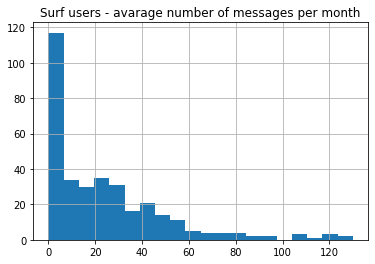

In [64]:
#plotting histogram for messages for users of surf plan
surf_users['avg_messages_monthly'].hist(bins=20)
plt.title('Surf users - avarage number of messages per month')
plt.show()

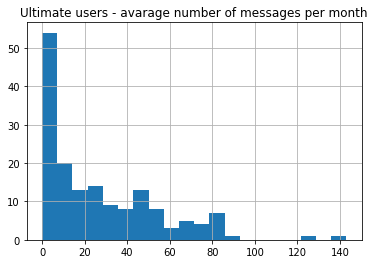

In [65]:
#plotting histogram for messages for users of ultimate plan
ultimate_users['avg_messages_monthly'].hist(bins=20)
plt.title('Ultimate users - avarage number of messages per month')
plt.show()

As can be seen, users of the surf plan on average send a bit fewer messages than users of the ultimate plan (23 and 26 messages correspondingly). And there is a greater variance in the number of messages for ultimate plan users. Many users in both plans do not send messages at all. The typical surf plan user sends between 0 and 40 messages monthly, while the typical ultimate plan user sends between 0 and 50 messages. Outliers in surf plans send up to 130 messages, and outliers in ultimate plans send more than 140 messages.

## Internet

Next, we will calculate the mean, variance, and standard deviation, plot histograms and describe the distributions for internet traffic for users of each plan.

In [66]:
#using describe method to get mean, standard deviation, and other statistics for internet traffic for users of surf plan
surf_users['avg_traffic_monthly'].describe()

count      339.000000
mean     11879.389381
std       6839.016157
min          0.000000
25%       6564.500000
50%      11931.000000
75%      16545.000000
max      33950.000000
Name: avg_traffic_monthly, dtype: float64

In [67]:
#using describe method to get mean, standard deviation, and other statistics for internet traffic for users of ultimate plan
ultimate_users['avg_traffic_monthly'].describe()

count      161.000000
mean     11484.403727
std       6934.599367
min          0.000000
25%       6177.000000
50%      11428.000000
75%      15908.000000
max      35469.000000
Name: avg_traffic_monthly, dtype: float64

In [68]:
#calculating varience for internet traffic for users of surf plan
np.var(surf_users['avg_traffic_monthly'])

46634171.075521454

In [69]:
#calculating varience for internet traffic for users of ultimate plan
np.var(ultimate_users['avg_traffic_monthly'])

47789980.99849543

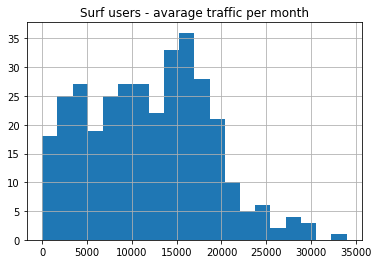

In [70]:
#plotting histogram for internet traffic for users of surf plan
surf_users['avg_traffic_monthly'].hist(bins=20)
plt.title('Surf users - avarage traffic per month')
plt.show()

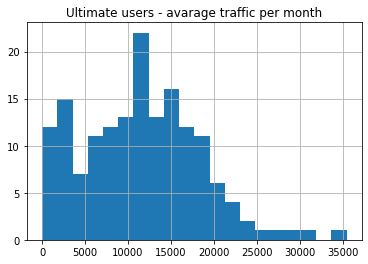

In [71]:
#plotting histogram for internet traffic for users of ultimate plan
ultimate_users['avg_traffic_monthly'].hist(bins=20)
plt.title('Ultimate users - avarage traffic per month')
plt.show()

As can be seen, surprisingly, even the users of the ultimate plan have a greater traffic limit, on average they use a bit fewer data than users of surf plan (11879 and 11484 Mb correspondingly for users of surf and ultimate plans). Again, there is a greater variance in traffic for ultimate plan users. The typical users of both plans use between 0 and 20 GB monthly, while outliers can use more than 35 GB.

## Revenue

Finally, we will calculate the mean, variance, and standard deviation, plot histograms and describe the distributions for revenue for users of each plan.

In [72]:
#using describe method to get mean, standard deviation, and other statistics for revenue for users of surf plan
surf_users['avg_revenue_monthly'].describe()

count    339.000000
mean      47.545723
std       32.579990
min       20.000000
25%       24.000000
50%       37.000000
75%       59.500000
max      220.000000
Name: avg_revenue_monthly, dtype: float64

In [73]:
#using describe method to get mean, standard deviation, and other statistics for revenue for users of ultimate plan
ultimate_users['avg_revenue_monthly'].describe()

count    161.000000
mean      71.167702
std        5.185600
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      119.000000
Name: avg_revenue_monthly, dtype: float64

In [74]:
#calculating variance for revenue for users of surf plan
np.var(surf_users['avg_revenue_monthly'])

1058.3246055986288

In [75]:
#calculating variance for revenue for users of ultimate plan
np.var(ultimate_users['avg_revenue_monthly'])

26.723428880058638

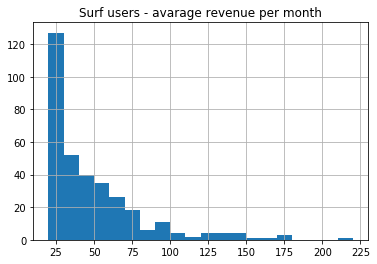

In [76]:
#plotting histogram for revenue for users of surf plan
surf_users['avg_revenue_monthly'].hist(bins=20)
plt.title('Surf users - avarage revenue per month')
plt.show()

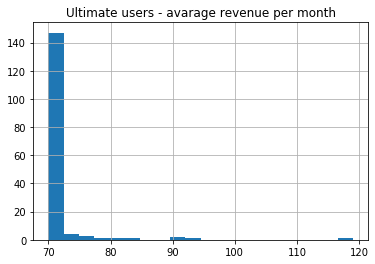

In [77]:
#plotting histogram for revenue for users of ultimate plan
ultimate_users['avg_revenue_monthly'].hist(bins=20)
plt.title('Ultimate users - avarage revenue per month')
plt.show()

As can be seen, the majority of ultimate plan users stay within plan limits. On average they pay 71 monthly, while outliers may pay up to 120.

Although a large number of surf plan users stay within the plan limits as well, there is a much greater variance in the amount paid monthly due to lower plan limits. An average surf plan users pay 37 monthly, while outliers may pay up to 225.

We studied and compared the behaviors of the users of both plans. Next, we will test statistical hypotheses regarding the revenue brought by different user groups.

# Stage 4: Testing statistical hypotheses <a id='data_test'></a>

In this final stage, we will test two statistical hypotheses regarding the revenue brought by different user groups. In both cases, we will test hypotheses that the means of the two statistical populations are equally based on samples taken from them. To do this we will apply the method scipy.stats.ttest_ind. In both cases, we will use a critical statistical significance level - alpha = 0.05. We will compare the p-value returned by scipy.stats.ttest_ind will be with alpha. If the p-value will be less than alpha, we will reject the hypothesis, otherwise, we will keep the hypothesis.

## Hypothesis 1 - The average revenue from users of Ultimate and Surf calling plans differs

For this hypothesis, we will formulate null hypotheses as "The average revenue from users of the Ultimate and Surf calling plans do not differ". The alternative hypothesis will be "The average revenue from users of Ultimate and Surf calling plans differs". As we saw previously variance of these two populations is very different, therefore we use the equal_var=False parameter when testing the hypothesis.

In [78]:
#Testing the hypothesis
results = st.ttest_ind(
    surf_users['avg_revenue_monthly'], 
    ultimate_users['avg_revenue_monthly'],
    equal_var=False)

#printing p-value received in the test
print('p-value: ', results.pvalue)

p-value:  3.7532882623993965e-32


As can be seen, the p-value is much lower than the alpha. Such a small p-value tells us that there is an extremely low probability of randomly getting a revenue difference that size or larger. In other words, the difference in revenue between users of Ultimate and Surf calling plans is not random. Therefore, we are rejecting the null hypothesis.

## Hypothesis 2 - The average revenue from users in NY-NJ area is different from that of the users from other regions

For this hypothesis we will formulate null hypotheses as "The average revenue from users in NY-NJ area is not different from that of the users from other regions". The alternative hypothesis will be "The average revenue from users in NY-NJ area is different from that of the users from other regions". Before testing this hypothesis we need to get slices of data for these user groups from the user table.

In [79]:
#getting slice of date for users in NY-NJ area
avg_revenue_monthly_NY_NJ=users[users['region']=='NY-NJ']['avg_revenue_monthly']

#getting slice of date for users from other regions
avg_revenue_monthly_others=users[users['region']=='Other']['avg_revenue_monthly']

Also, let see how average revenue from users in NY-NJ area is different from that of the users from other regions for the given client selection.

In [80]:
#calculating average revenue from users in NY-NJ area
avg_revenue_monthly_NY_NJ.mean()

53.8125

In [81]:
#calculating average revenue for users from different regions
avg_revenue_monthly_others.mean()

55.40714285714286

The difference is not very big.

In addition, before testing the hypothesis we need to know if the variance of these two populations is different to address it in the calculations.

In [82]:
#calculating average revenue variance for users in NY-NJ area
np.var(avg_revenue_monthly_NY_NJ)

745.67734375

In [83]:
#calculating average revenue variance for users from different regions
np.var(avg_revenue_monthly_others)

867.0461394557824

As can be seen, variance of these two populations is different, therefore we use equal_var=False parameter when testing the hypothesis.

In [84]:
#Testing the hypothesis
results = st.ttest_ind(
    avg_revenue_monthly_NY_NJ, 
    avg_revenue_monthly_others,
    equal_var=False)

#printing p-value received in the test
print('p-value: ', results.pvalue)

p-value:  0.6391879384349464


As can be seen, the p-value is high above the alpha. P-value tells us that there is a 64% probability of randomly getting a revenue difference that size or larger. In other words, it is very likely that the difference in revenue between users in the NY-NJ area and the users from other regions is a result of random. Therefore, we cannot reject the null hypothesis.

# General conclusion <a id='conclusion'></a>

In this project, we carried out a preliminary analysis of the plans based on a small client selection. Firstly, we prepare the data for the analysis. In the `users` table, we fixed types of `reg_date` and `churn_date` columns and filled missing values in the `churn_date` column with the last day of the year 2018. In addition, to ease the calculations we added `duration` and `region` columns. For `calls`, `messages`, and `internet` tables we fixed types of columns that contain dates. Also, to ease the calculations we added the `month` column to these three tables. In addition, in the `calls` table, we changed the type of `duration` column to int rounding values there to the ceiling.

Secondly, we aggregated the data per user to ease the analysis. We calculated the average number of calls per user per month, the average number of minutes per user per month, the average number of messages per user per month, the average traffic per user per month, and the average revenue per user per month and added them to `users` table.

Then, studied and compared the behaviors of the users of both plans. We found the minutes, texts, and volume of data the users of each plan require and the revenue they bring per month. We calculated the mean, variance, and standard deviation plotted histograms, and described the distributions. We found that the usage behavior of users of both plans for the given client selection is quite similar. But due to higher plan limits, the majority of ultimate plan users stay within plan limits while many surf users exceed the limit. On average ultimate plan users pay 71 monthly, while outliers may pay up to 120. An average surf plan users pay 37 monthly, while outliers may pay up to 225.

Finally, we tested statistical hypotheses about revenue driven by different plans and by different user categories. Based on the tests we rejected null hypotheses formulated as "The average revenue from users of the Ultimate and Surf calling plans do not differ" and kept null hypotheses formulated as "The average revenue from users in NY-NJ area is not different from that of the users from other regions".

Based on that we would recommend promoting the Ultimate plan in all regions as it brings revenue twice as much as revenue brought by Surf plan.